### For this task I completed web scraping as well as I implemented polynomial regression up to 4th degree and I finally calculated R-squared values. At the end I critique my fitted models.

In [ ]:
import requests
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
# setting numpy to prevent scientific notifications
np.set_printoptions(suppress=True)
# path with link to data
URL = 'https://sunrise-sunset.org/search?location=coventry'
page = requests.get(URL)
output_path = r'C://Users/***/Dropbox/STUDY/Principles_of_Data_Science/Coursework/'
calendar = pd.date_range(start='1/2020',
                         end='3/2021',
                         freq='M').strftime(URL+'&year=%Y&month=%m#calendar')
print(calendar) # print calendar to check if links were generated correctly

Index(['https://sunrise-sunset.org/search?location=coventry&year=2020&month=01#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2020&month=02#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2020&month=03#calendar',
'https://sunrise-sunset.org/search?location=coventry&year=2020&month=04#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2020&month=05#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2020&month=06#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2020&month=07#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2020&month=08#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2020&month=09#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2020&month=10#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2020&month=11#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2020&month=12#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2021&month=01#calendar', 'https://sunrise-sunset.org/search?location=coventry&year=2021&month=02#calendar'], dtype='object')

In [ ]:
# data webscrapping
i = 0
for dat in calendar:
    print(dat)
    html = requests.get(dat).content  # requesting data from website
    df_list = pd.read_html(html)  # reading table from website
    df = df_list[-1]
    df.columns = df.columns.droplevel(-1)
    df.to_csv('Coventry_data.csv', mode='a', header=(i == 0))
    # saving data locally just in case of lack of internet(extra backup)
    i += 1
    print('Done')

https://sunrise-sunset.org/search?location=coventry&year=2020&month=01#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=02#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=03#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=04#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=05#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=06#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=07#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=08#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=09#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=10#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=11#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2020&month=12#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2021&month=01#calendar Done\
https://sunrise-sunset.org/search?location=coventry&year=2021&month=02#calendar Done\

In [ ]:
df0 = pd.read_csv(output_path+'Coventry_data.csv')  # loading our dataset
print(list(df0))  # checking headers of dataset

['Unnamed: 0', 'Day', 'Twilight start', 'Sunrise', 'Sunset', 'Twilight end', 'Day length', 'Solar noon', 'Nautical twilight', 'Nautical twilight.1', 'Astronomical twilight', 'Astronomical twilight.1']

In [ ]:
print(df0.head())  # checking all names of columns

Unnamed: 0 Day ... Astronomical twilight Astronomical twilight.1 0 0 Wed, Jan 1 ... 6:09 am 6:09 pm 1 1 Thu, Jan 2 ... 6:09 am 6:10 pm 2 2 Fri, Jan 3 ... 6:09 am 6:11 pm 3 3 Sat, Jan 4 ... 6:09 am 6:12 pm 4 4 Sun, Jan 5 ... 6:09 am 6:13 pm

In [ ]:
# Let's use only Day and Day length
df0 = df0[['Day', 'Day length']].iloc[1:].rename({'Day': 'Date',
                                                  'Day length': 'Length'}, axis=1)
# Columns slicing
df0['h'] = df0.Length.str[-8:-6].astype(int)  # slicing towards full hours
df0['m'] = df0.Length.str[-5:-3].astype(int)  # slicing towards full minutes
df0['s'] = df0.Length.str[6:8].astype(int)    # slicing towards full seconds
# calculating how long days are in Hours as a fraction
df0['Time'] = df0.h + df0.m/60 + df0.s/3600
# data preparation for calculating matrices
g1 = 398  # range for plotting and calculating
g2 = 31   # choose data interval, choose how many samples you want to have
g3 = math.ceil(g1/g2)  # calculate how many ones have to be inputted in column
df0 = df0.reset_index()    # index reseting
df0 = df0.iloc[0:g1]       # selecting one column to plot
df = df0.iloc[0:g1:g3, :]  # choosing only every -n row from dataset
p0 = df.iloc[:, -1:]       # getting all y values for residuals calculation
# plot data for verification
# labels for axis and title
tL = 'Graphical representation of sunset-sunrise dataset'
xL = 'Ordinal day starts from 1st Jan 2020'
yL = 'Day length[h]'
# Initial plot to check data validity
plt.figure(figsize=(10, 6))
plt.scatter(df['index'], df['Time'])
plt.title(tL)
plt.xlabel(xL)
plt.ylabel(yL)
plt.grid()
plt.show()

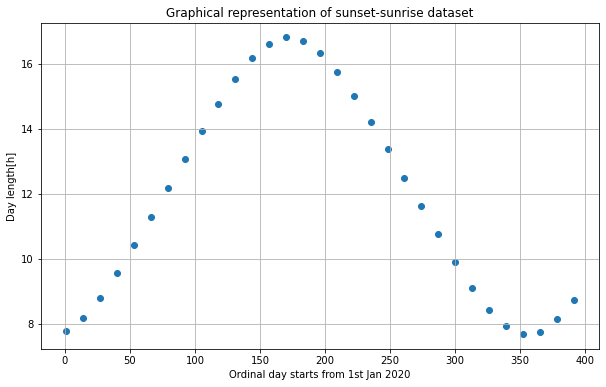

In [ ]:
# preparing data for polynomials calculations
px = df['index']
py = df['Time']
# 2 variables for plotting
dfx = df0['index']
dfy = df0['Time']
# getting array of y
y = np.vstack(py)
ones = np.ones(((g2), 1))
x = np.vstack(px)
# getting array of x, no time for automation of below tasks, hence brute force
# several lines later can be found more sophisticated solution.
xi = np.power(x, 2)  # calculating x-squared values
xii = np.power(x, 3)  # calculating x-cubical values
xiii = np.power(x, 4)  # calculating x-quartered values
x2 = np.hstack((ones, x, xi))  # adding columns together
x3 = np.hstack((ones, x, xi, xii))  # adding columns together
x4 = np.hstack((ones, x, xi, xii, xiii))  # adding columns together
t2 = x2.T  # calculate transponsed matrix
t3 = x3.T  # calculate transponsed matrix
t4 = x4.T  # calculate transponsed matrix
xtx2 = t2@x2  # calculate t dot x
xtx3 = t3@x3  # calculate t dot x
xtx4 = t4@x4  # calculate t dot x
xty2 = t2@y  # calculate t dot y
xty3 = t3@y  # calculate t dot y
xty4 = t4@y  # calculate t dot y
xtxinv2 = np.linalg.inv(xtx2)  # calculate inverted matrix
xtxinv3 = np.linalg.inv(xtx3)  # calculate inverted matrix
xtxinv4 = np.linalg.inv(xtx4)  # calculate inverted matrix
B2 = xtxinv2@xty2  # calculate intercept and multiplier values
B3 = xtxinv3@xty3  # calculate intercept and multiplier values
B4 = xtxinv4@xty4  # calculate intercept and multiplier values
print('Equation for the best fit for polynomial of 2nd degree: y= \n',
      B2[2], 'x**2 +', B2[1], 'x +', B2[0])

Equation of the best fit for polynomial of 2nd degree: Y = [-0.00022883] x^2 + [0.08290425] x + [7.5432407]

In [ ]:
print('Equation for the best fit for polynomial of 3rd degree: y= \n',
      B3[3], 'x**3 +', B3[2], 'x**2 +', B3[1], 'x +', B3[0])

Equation of the best fit for polynomial of 3rd degree: Y = [0.00000075] x^3 + [-0.00067173] x^2 + [0.15140745] x + [5.45957405]

In [ ]:
print('Equation for the best fit for polynomial of 4th degree: y= \n',
      B4[4], 'x**4 +', B4[3], 'x**3 +', B4[2], 'x**2 +', B4[1], 'x +', B4[0])

Equation of the best fit for polynomial of 4th degree: Y = [0.] x^4 + [0.00000067] x^3 + [-0.00062254] x^2 + [0.14347148] x + [5.65464038] 

In [ ]:
xB2 = x2@B2  # let's calculate fitted(predicted) values
xB2 = xB2.astype(float)
xB3 = x3@B3  # let's calculate fitted(predicted) values
xB3 = xB3.astype(float)
xB4 = x4@B4  # let's calculate fitted(predicted) values
xB4 = xB4.astype(float)
# calculating stats for polynomials (both solutions gave the same results)
k = range(1,5)  # range for bunch of loops (and set up degree of polynomial)
d = {}  # calculate polynomial coefficients
for i in k:  # for range 0-4 run loop
    d[i] = np.polyfit(px, y, i)
    print(i, '-n degree polynomial equation:',
          d[i])

1-n degree polynomial equation: [[-0.00679875] [13.24029673]]\
2-n degree polynomial equation: [[-0.00022883] [ 0.08290425] [ 7.5432407 ]]\
3-n degree polynomial equation: [[ 0.00000075] [-0.00067173] [ 0.15140745] [ 5.45957405]]\
4-n degree polynomial equation: [[ 0.00000001] [-0.00000557] [ 0.00090842] [ 0.01798225] [ 7.75658337]]

In [ ]:
dp = {}  # all values by degree
for i in k:
    dp[i] = np.polyval(d[i], dfx)
res = {}  # residuals
for i in k:
    res[i] = dp[i] - dfy
rsqrd = {}  # R-squared values
for i in k:
    rsqrd[i] = round(r2_score(dfy, dp[i]), 5)
print('R2:', rsqrd)
rmse = {}  # rmse values
for i in k:
    rmse[i] = np.sqrt(mean_squared_error(dfy, dp[i]))
print('RMSE:', rmse)  # bear in mind that axis are not equal on plot
mean = {}  # mean values
for i in k:
    mean[i] = np.mean(dp[i])
print('MEAN:', mean)  # bear in mind that axis are not equal on plot
std = {}  # standard deviation values
for i in k:
    std[i] = np.std(dp[i])
print('STD:', std)  # bear in mind that axis are not equal on plot

R2: {1: 0.08342, 2: 0.80067, 3: 0.90271, 4: 0.99584}\
RMSE: {1: 3.0311807594403892, 2: 1.413560217200637, 3: 0.987578685911847, 4: 0.20431538392099985}\
MEAN: {1: 11.883946314102566, 2: 11.954312828043399, 3: 11.994676822465793, 4: 11.968045537991586}\
STD: {1: 0.7811241839797769, 2: 2.86896368053806, 3: 2.9371273592159235, 4: 3.157472510080381}\
Equations of the models are as follows (slightly different, as I used different number of samples):\
2 (quadratic): y = -0.00023073*x2 + 0.083906*x + 7.4417526\
3 (cubic): y = 0.00000072*x3 + 0.00065669*x2 + 0.14978988*x + 5.43775794\
4 (quartic): y = 0.00000001*x4 -0.00000563*x3 + 0.00093152*x2 + 0.01568427*x + 7.74648096\

In [ ]:
# plot all polynomials
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(dfx, dfy, 'r-', label='original')
plt.plot(dfx, np.polyval(d[0], dfx), 'k--', label='non-zero constant')
plt.plot(dfx, np.polyval(d[1], dfx), 'b--', label='linear')
plt.plot(dfx, np.polyval(d[2], dfx), 'g--', label='quadratic')
plt.plot(dfx, np.polyval(d[3], dfx), 'y--', label='cubic')
plt.plot(dfx, np.polyval(d[4], dfx), 'm--', label='quartic')
plt.grid()
plt.ylim(5, 17)  # Set this limits to make visual comparisons easier
plt.legend()
plt.title('Chart of regression models')
plt.xlabel(xL)
plt.ylabel(yL)
plt.show()

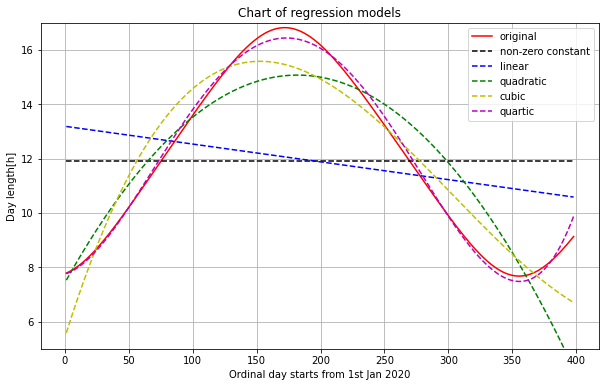

In [ ]:
# plot polynomial models and residuals together on individual chart
for i in k:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    plt.vlines(dfx, dp[i], dfy, 'r', '-', label='residual', alpha=0.66)
    plt.plot(dfx, np.polyval(d[i], dfx), 'g--', label='fitted line')
    plt.plot(dfx, dfy, 'b-', label='sample')
    z = 'R-squared:', rsqrd[i]  # adding annotation to chart
    plt.annotate(xy=(0.01, 0.96), xycoords='axes fraction', text=z)
    plt.grid()
    plt.legend()
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.ylim(4, 18)
    titl = 'Chart of regression model of degree', i  # tilte of chart
    plt.title(titl)
    plt.show()

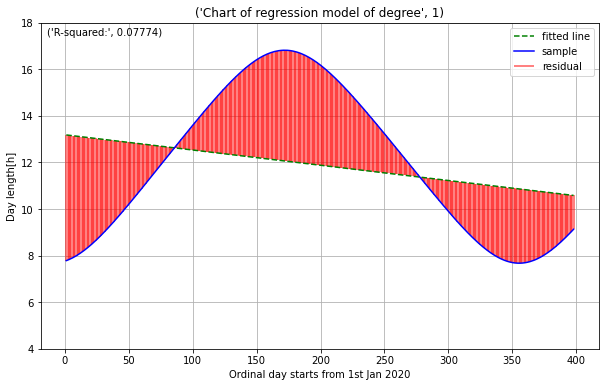



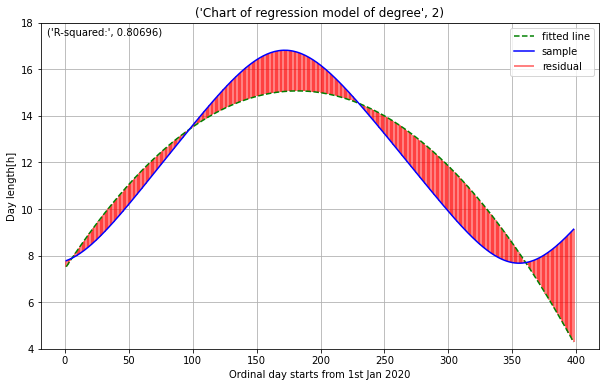

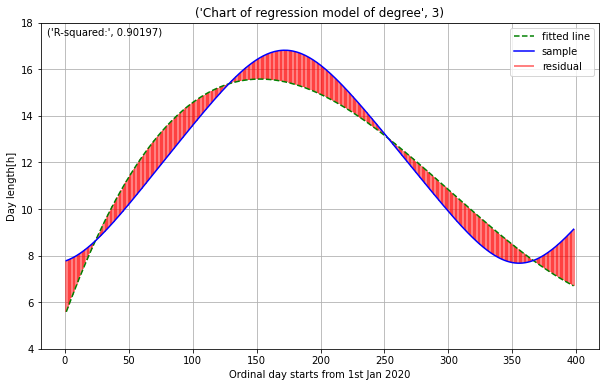

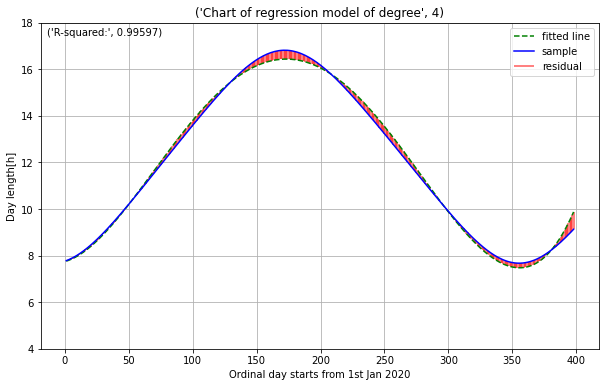

At first glance I observed that sample data has sinusoidal (in simplification) pattern, reaching from almost 8 to almost 17 values. Amplitude is exactly the same in both ways, from 12ish to almost 17 and from 12ish slightly below 8. From chart (and life experience) I can say that period is about 365 days, peak of the chart is the first day of the Summer, and the first day of the Winter are troughs. Dataset has no missing data, all numbers are in relation to each other, nothing has to be removed or fixed.\
In total I used 31 samples of data from whole dataset of 398 features (samples).\
As far as I understand charts, the best matching model occurs for 4th degree of polynomial regression. Residuals are very good in this case, R2 is close to 1, which means that this model fits like a glove. RMSE value is the best of all 5 models and 5 times lower than in case of 3rd degree polynomial regression. Fitted line almost not under- and over- fit anywhere, which proves quality of chart. Standard Deviation is the biggest from all polynomial lines which means that values are spread quite well (in case of this “wave” type of relation between data).\
I also tested chart on higher levels, where for degree of level 50 fitted model matched almost exactly, reaching low levels of RMSE and extremely high R2. It was difficult to show over-fitting of chart with any polynomial degree.